In [1]:
from model.GP_model import GP
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp

/home/lolanff/plant-rl/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lolanff/plant-rl/.venv/lib/python3.12/site-packages/cola/backends/backends.py:75: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(cls, tree_flatten, tree_unflatten)


In [2]:
# Retrieve cleaned data
data = np.load("mean_size_1day.npy")
input_data = data[:, :4]   # input = [morning area, one-hot action]
output_data = data[:, -1].reshape(-1, 1)  # output = [next morning area]

In [3]:
GP_model = GP(input_data, output_data) #, kernel = gpx.kernels.RBF())

/home/lolanff/plant-rl/.venv/lib/python3.12/site-packages/cola/backends/backends.py:75: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(cls, tree_flatten, tree_unflatten)
/home/lolanff/plant-rl/.venv/lib/python3.12/site-packages/cola/backends/backends.py:75: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(cls, tree_flatten, tree_unflatten)


Optimization terminated successfully.
         Current function value: -140.076972
         Iterations: 17
         Function evaluations: 26
         Gradient evaluations: 26


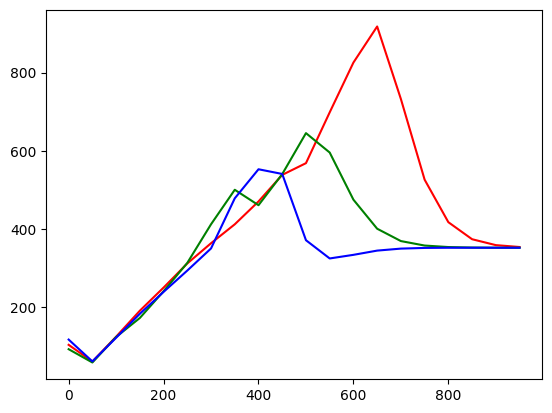

In [14]:
red_pred = []
white_pred = []
blue_pred = []
sizes = np.arange(0, 1000, 50)
for size in sizes: 
    red_test = jnp.array([size, 1, 0, 0])
    white_test = jnp.array([size, 0, 1, 0])
    blue_test = jnp.array([size, 0, 0, 1])
    red_pred.append(np.mean(GP_model.sample_output(red_test)))
    white_pred.append(np.mean(GP_model.sample_output(white_test)))
    blue_pred.append(np.mean(GP_model.sample_output(blue_test)))
plt.plot(sizes, red_pred, 'r')
plt.plot(sizes, white_pred, 'g')
plt.plot(sizes, blue_pred, 'b')